In [1]:
# Cargar y procesar datos
import pandas as pd
# Graficar datos
import seaborn as sns
import matplotlib.pyplot as plt
# Análisis estadistico de datos
import statsmodels.api as sm
from scipy import stats
import pingouin as pg

# Cargando los datos

* Lectura de datos ``pandas``

In [4]:
datos = pd.read_csv('datos_estudio.csv')
datos.head()

,Horas de estudio,Puntuacion en el examen,Horas de ocio
0,3.784905,69.095973,6.918823
1,4.747727,69.496464,7.294440
2,3.630787,69.498093,8.214682
3,6.857429,75.580261,5.463370
4,1.311198,57.188455,8.794476


# Entendiendo los datos

* Tamaño: ``shape``
* Exploración: ``head`` and ``tail``
* Tipos de datos: ``dtypes``
* Estadísticos: ``describe``

In [7]:
datos.shape

(50, 3)

In [8]:
datos.head()

,Horas de estudio,Puntuacion en el examen,Horas de ocio
0,3.784905,69.095973,6.918823
1,4.747727,69.496464,7.294440
2,3.630787,69.498093,8.214682
3,6.857429,75.580261,5.463370
4,1.311198,57.188455,8.794476


In [9]:
datos.tail()

,Horas de estudio,Puntuacion en el examen,Horas de ocio
45,5.533433,81.509207,7.217560
46,5.017979,78.107876,5.798326
47,6.282206,82.704351,6.239263
48,4.644586,63.472584,8.552032
49,6.392555,78.763549,8.523241


In [10]:
datos.dtypes

Horas de estudio           float64
Puntuacion en el examen    float64
Horas de ocio              float64
dtype: object

In [11]:
datos.describe()

,Horas de estudio,Puntuacion en el examen,Horas de ocio
count,50.000000,50.000000,50.000000
mean,5.157321,75.175550,7.293003
std,1.685515,9.663950,1.365038
min,1.311198,57.188455,4.066011
25%,4.125221,69.196096,6.475270
50%,5.128872,74.849005,7.337228
75%,6.255795,81.712216,8.365915
max,9.584981,100.000000,10.000000


# Preparación y limpieza de datos

Aunque en este ejemplo los datos ya están limpios este sería un paso ideal antes de probar cualquier prueba de correlación.

* Valores faltantes.
* Identificar filas duplicadas.
* __Revisión de valores atípicos.__
* Análisis de consistencia de los datos.
* Selección de variables.

In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Horas de estudio         50 non-null     float64
 1   Puntuacion en el examen  50 non-null     float64
 2   Horas de ocio            50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [16]:
datos[datos.duplicated()]

,Horas de estudio,Puntuacion en el examen,Horas de ocio


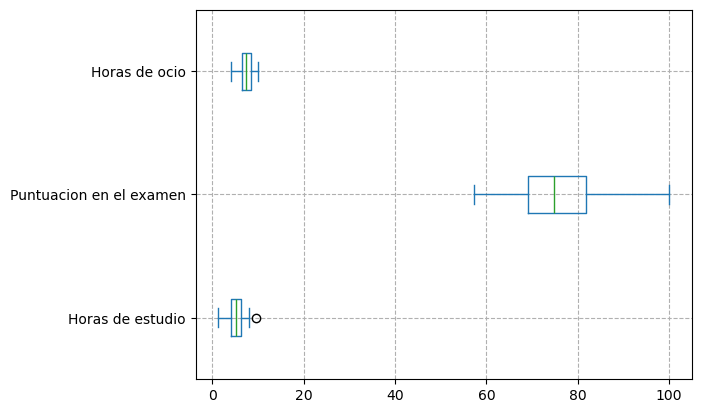

In [17]:
datos.plot(kind = 'box', vert = False)
plt.grid(ls = '--')

# Análisis gráfico de los datos

* Diagramas de puntos ``scatterplot``
* Histogramas ``hist``
* displot ``pairplot``

In [29]:
datos.columns

Index(['Horas de estudio', 'Puntuacion en el examen', 'Horas de ocio'], dtype='object')

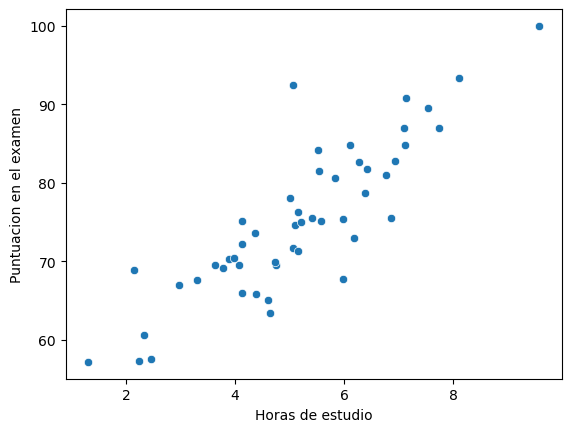

In [31]:
sns.scatterplot(data = datos, x = 'Horas de estudio', y ='Puntuacion en el examen')
plt.show()

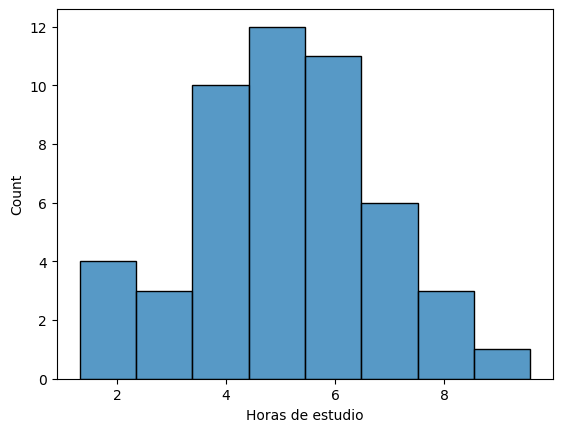

In [32]:
sns.histplot(data = datos, x = 'Horas de estudio');

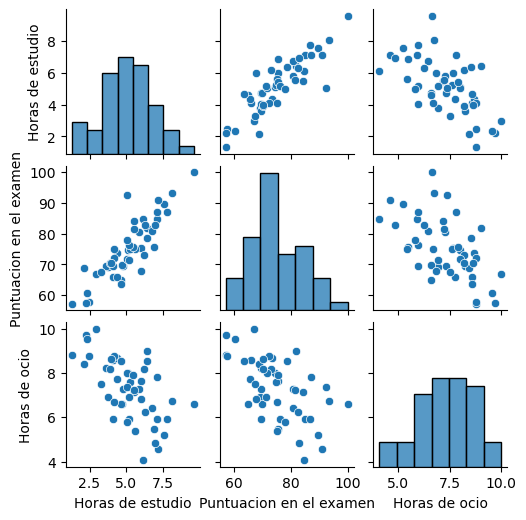

In [33]:
sns.pairplot(datos, height = 1.75)

# Análisis normalidad

* Evaluación gráfica - > ``histogramas``, ``qqplots``
* Test estadísticos -> ``Shapiro-Wilk test`` - ``Kolmogórov``

In [69]:
datos.columns

Index(['Horas de estudio', 'Puntuacion en el examen', 'Horas de ocio'], dtype='object')

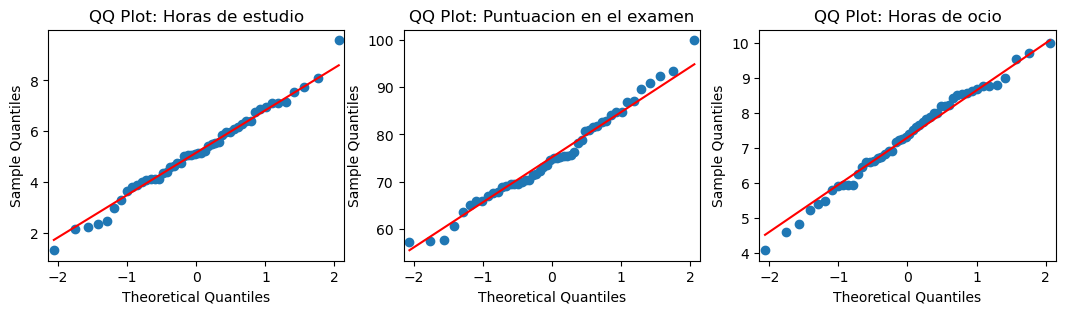

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(13, 3))
# Generar QQ plots para cada columna
for i, col in enumerate(datos.columns):
    sm.qqplot(datos[col], line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot: {col}')

In [82]:
stats.shapiro(datos['Horas de estudio'])

ShapiroResult(statistic=0.991936445236206, pvalue=0.9806735515594482)

In [84]:
stats.shapiro(datos['Puntuacion en el examen'])

ShapiroResult(statistic=0.980756402015686, pvalue=0.5842764377593994)

In [86]:
# Aplicar el Test de Shapiro-Wilk a cada columna
for col in datos.columns:
    stat, p = stats.shapiro(datos[col])
    print(f'{col}:, Estadístico de Shapiro-Wilk: {stat:.4f}, p-valor: {p:.4f}')
    if p < 0.05:
        print('Los datos no siguen una distribución normal (p < 0.05).')
    else:
        print('Los datos podrían seguir una distribución normal (p ≥ 0.05).')
    print()

Horas de estudio:, Estadístico de Shapiro-Wilk: 0.9919, p-valor: 0.9807
Los datos podrían seguir una distribución normal (p ≥ 0.05).

Puntuacion en el examen:, Estadístico de Shapiro-Wilk: 0.9808, p-valor: 0.5843
Los datos podrían seguir una distribución normal (p ≥ 0.05).

Horas de ocio:, Estadístico de Shapiro-Wilk: 0.9854, p-valor: 0.7870
Los datos podrían seguir una distribución normal (p ≥ 0.05).



<div style="border-left: 4px solid #2196F3; background-color: #E3F2FD; padding: 10px; border-radius: 5px;">
    <strong style="color: #1976D2;">
        <i class="fa fa-info-circle" aria-hidden="true"></i> Información
    <ul style="list-style-type: none; padding-left: 0; margin-top: 5px;">
        <li style="padding: 8px 0; color: #2E7D32; font-weight: bold;">
            <span style="color: #388E3C; font-weight: bold;">Hipótesis nula (H₀):</span> Los datos siguen una distribución normal.
        </li>
        <li style="padding: 8px 0; color: #C62828; font-weight: bold;">
            <span style="color: #D32F2F; font-weight: bold;">Hipótesis alternativa (H₁):</span> Los datos no siguen una distribución normal.
        </li>
        <li style="padding: 8px 0; color: #2E7D32;">
            <span style="color: #388E3C; font-weight: bold;">p-valor > 0.05:</span> Acepta (H₀): Los datos siguen una distribución normal.
        </li>
        <li style="padding: 8px 0; color: #C62828;">
            <span style="color: #D32F2F; font-weight: bold;">p-valor < 0.05:</span> Rechaza (H₀): Los datos no siguen una distribución normal.
        </li>
    </ul>
</div>

# Análisis de correlación

* Cálculo coeficientes de correlación ``pandas``
* Análisis gráfico ``heatmap``
* Significancia estadística

In [101]:
correlacion_person = datos.corr(method = 'pearson')
correlacion_person

,Horas de estudio,Puntuacion en el examen,Horas de ocio
Horas de estudio,1.000000,0.861973,-0.603507
Puntuacion en el examen,0.861973,1.000000,-0.569777
Horas de ocio,-0.603507,-0.569777,1.000000


<Axes: >

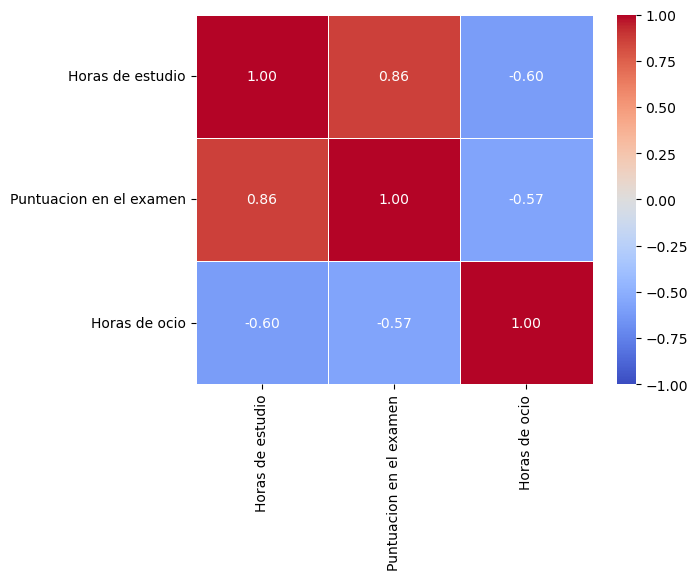

In [105]:
sns.heatmap(correlacion_person, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmax = 1, vmin = -1)

In [112]:
pg.pairwise_corr(datos, method = 'pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Horas de estudio,Puntuacion en el examen,pearson,two-sided,50,0.861973,"[0.77, 0.92]",9.101003e-16,7.038e+12,1.000000
1,Horas de estudio,Horas de ocio,pearson,two-sided,50,-0.603507,"[-0.76, -0.39]",3.496707e-06,6087.364,0.997943
2,Puntuacion en el examen,Horas de ocio,pearson,two-sided,50,-0.569777,"[-0.73, -0.35]",1.568761e-05,1512.465,0.994034


<div style="border-left: 4px solid #2196F3; background-color: #E3F2FD; padding: 10px; border-radius: 5px;">
    <strong style="color: #1976D2;">
        <i class="fa fa-info-circle" aria-hidden="true"></i> Información
    <ul style="list-style-type: none; padding-left: 0; margin-top: 5px;">
        <li style="padding: 8px 0; color: #2E7D32; font-weight: bold;">
            <span style="color: #388E3C; font-weight: bold;">Hipótesis nula (H₀):</span> No existe una correlación significativa entre el par de variables.
        </li>
        <li style="padding: 8px 0; color: #C62828; font-weight: bold;">
            <span style="color: #D32F2F; font-weight: bold;">Hipótesis alternativa (H₁):</span> Existe una correlación significativa entre el par de variables.
        </li>
        <li style="padding: 8px 0; color: #2E7D32;">
            <span style="color: #388E3C; font-weight: bold;">p-valor > 0.05:</span> Acepta (H₀): No existe una correlación significativa.
        </li>
        <li style="padding: 8px 0; color: #C62828;">
            <span style="color: #D32F2F; font-weight: bold;">p-valor < 0.05:</span> Rechaza (H₀): La correlacion entre variables es significativa.
        </li>
    </ul>
</div>

# Conclusión

El análisis muestra las correlaciones entre las horas de estudio, la puntuación en el examen y las horas de ocio:

* Horas de estudio y Puntuación en el examen: Existe una correlación positiva fuerte (r = 0.863), lo que indica que a más horas de estudio, mayor es la puntuación en el examen. Este resultado es altamente significativo (p < 0.001).

* Horas de estudio y Horas de ocio: Hay una correlación negativa fuerte (r = -0.603), sugiriendo que a más horas de estudio, menos tiempo se dedica al ocio. Este resultado también es muy significativo (p < 0.001).

* Puntuación en el examen y Horas de ocio: Existe una correlación negativa moderada a fuerte (r = -0.566), indicando que más horas de ocio están asociadas con puntuaciones más bajas en el examen. Este resultado es igualmente significativo (p < 0.001).